<a href="https://colab.research.google.com/github/AhmedHassanGamal/AhmedHassanGamal/blob/main/emergencyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [4]:
X = pd.read_excel('RTA Dataset.xlsx')
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [5]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Vehicle_driver_relation      11737 non-null  object
 5   Types_of_Junction            11429 non-null  object
 6   Road_surface_conditions      12316 non-null  object
 7   Light_conditions             12316 non-null  object
 8   Weather_conditions           12316 non-null  object
 9   Type_of_collision            12161 non-null  object
 10  Number_of_vehicles_involved  12316 non-null  int64 
 11  Number_of_casualties         12316 non-null  int64 
 12  Vehicle_movement             12008 non-null  object
 13  Pedestrian_movement          12

In [6]:
X.isnull()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12312,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12313,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12314,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
X.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Vehicle_driver_relation,579
Types_of_Junction,887
Road_surface_conditions,0
Light_conditions,0
Weather_conditions,0
Type_of_collision,155


In [8]:
imputer = SimpleImputer(strategy="most_frequent")
X[['Vehicle_driver_relation']]=imputer.fit_transform(X[['Vehicle_driver_relation']])
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [9]:
imputer = SimpleImputer(strategy="most_frequent")
X[['Type_of_collision']]=imputer.fit_transform(X[['Type_of_collision']])
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [10]:
imputer = SimpleImputer(strategy="most_frequent")
X[['Types_of_Junction']]=imputer.fit_transform(X[['Types_of_Junction']])
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [11]:
imputer = SimpleImputer(strategy="most_frequent")
X[['Vehicle_movement']]=imputer.fit_transform(X[['Vehicle_movement']])
X

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Types_of_Junction,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Employee,No junction,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Employee,Y Shape,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Employee,No junction,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Employee,No junction,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [12]:
X.isnull().sum()


,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Vehicle_driver_relation,0
Types_of_Junction,0
Road_surface_conditions,0
Light_conditions,0
Weather_conditions,0
Type_of_collision,0


In [13]:
X.Pedestrian_movement.apply(type).unique()

array([<class 'str'>], dtype=object)

In [14]:
X.Sex_of_driver.apply(type).unique()

array([<class 'str'>], dtype=object)

In [15]:
X.Accident_severity.apply(type).unique()

array([<class 'str'>], dtype=object)

In [16]:
X.Accident_severity.apply(type).value_counts()
# Find the locations (indexes) of the specific value in the column
locations = X.index[X.Accident_severity.apply(type) == int].tolist()
locations

[]

In [17]:
X[['Number_of_vehicles_involved','Number_of_casualties']].describe().round(2)

,Number_of_vehicles_involved,Number_of_casualties
count,12316.00,12316.00
mean,2.04,1.55
std,0.69,1.01
min,1.00,1.00
25%,2.00,1.00
50%,2.00,1.00
75%,2.00,2.00
max,7.00,8.00


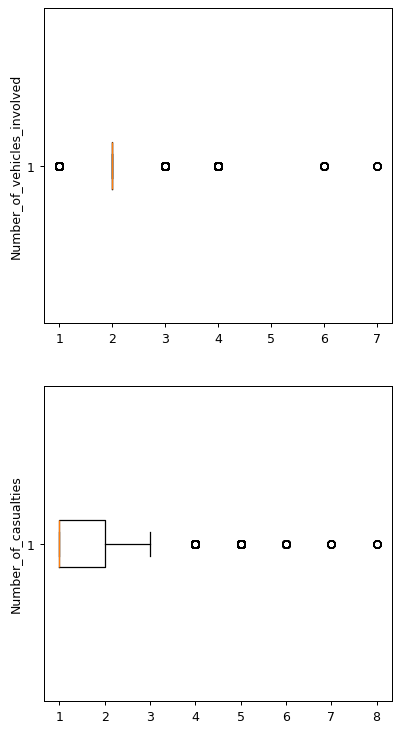

In [18]:
# Box Plots
fig, axs = plt.subplots(2,1,dpi=90, figsize=(5,10))
i = 0
for col in X[['Number_of_vehicles_involved','Number_of_casualties']]:
    axs[i].boxplot(X[[col]], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [19]:
# Calculate Q1, Q3, and IQR
Q1 = X.Number_of_casualties.quantile(0.25)
Q3 = X.Number_of_casualties.quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = X[(X.Number_of_casualties < lower_bound) | (X.Number_of_casualties  > upper_bound)]

# Display outliers
print("Outliers:")
print(outliers)

Outliers:
           Time Day_of_week Age_band_of_driver Sex_of_driver  \
72     11:02:00    Thursday              31-50          Male   
73     11:02:00    Thursday              31-50          Male   
74     11:02:00    Thursday              31-50          Male   
75     11:02:00    Thursday              31-50          Male   
107    23:36:00    Thursday           Under 18          Male   
...         ...         ...                ...           ...   
12271  18:35:00    Saturday              31-50          Male   
12296  15:31:00      Monday            Over 51          Male   
12297  12:30:00    Thursday              18-30          Male   
12298  18:45:00   Wednesday              18-30          Male   
12299  18:45:00   Wednesday              31-50          Male   

      Vehicle_driver_relation Types_of_Junction Road_surface_conditions  \
72                   Employee       No junction                     Dry   
73                   Employee       No junction                     Dry

In [20]:
# Calculate Q1, Q3, and IQR
Q1 = X.Number_of_vehicles_involved.quantile(0.25)
Q3 = X.Number_of_vehicles_involved.quantile(0.75)
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = X[(X.Number_of_vehicles_involved < lower_bound) | (X.Number_of_vehicles_involved  > upper_bound)]

# Display outliers
print("Outliers:")
print(outliers)

Outliers:
           Time Day_of_week Age_band_of_driver Sex_of_driver  \
5      14:15:00      Friday              31-50          Male   
6      17:30:00   Wednesday              18-30          Male   
21     15:10:00    Thursday              18-30          Male   
27     14:35:00      Friday              18-30          Male   
30     15:30:00      Monday              18-30          Male   
...         ...         ...                ...           ...   
12301  17:25:00      Friday              31-50          Male   
12302  17:25:00      Friday              31-50          Male   
12307  17:10:00      Friday              31-50          Male   
12310  09:05:00      Friday              18-30          Male   
12313  13:55:00      Sunday            Over 51          Male   

      Vehicle_driver_relation Types_of_Junction Road_surface_conditions  \
5                     Unknown           Y Shape                     Dry   
6                    Employee          Crossing                     Dry

In [21]:
#### there no outliers in my data #####
### but we do min_max for test code ###

from sklearn.preprocessing import MinMaxScaler
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# learning the statistical parameters for each of the data and transforming
X[['Number_of_vehicles_involved']]= scaler.fit_transform(X[['Number_of_vehicles_involved']])
print(X['Number_of_vehicles_involved'])

0        0.166667
1        0.166667
2        0.166667
3        0.166667
4        0.166667
           ...   
12311    0.166667
12312    0.166667
12313    0.000000
12314    0.166667
12315    0.166667
Name: Number_of_vehicles_involved, Length: 12316, dtype: float64


In [22]:
from sklearn.preprocessing import MinMaxScaler
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# learning the statistical parameters for each of the data and transforming
X[['Number_of_casualties']]= scaler.fit_transform(X[['Number_of_casualties']])
print(X['Number_of_casualties'])

0        0.142857
1        0.142857
2        0.142857
3        0.142857
4        0.142857
           ...   
12311    0.000000
12312    0.000000
12313    0.000000
12314    0.000000
12315    0.000000
Name: Number_of_casualties, Length: 12316, dtype: float64


In [23]:
value_counts = X['Sex_of_driver'].value_counts()
print(value_counts)

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64


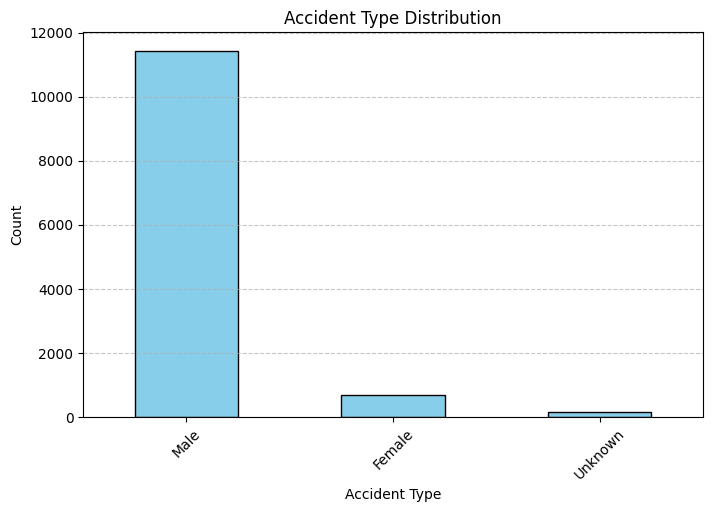

In [24]:
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Accident Type Distribution")
plt.xlabel("Accident Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
duplicates = X[X.duplicated()]
print(duplicates)

           Time Day_of_week Age_band_of_driver Sex_of_driver  \
103    19:55:00      Monday              18-30          Male   
110    23:36:00    Thursday           Under 18          Male   
141    06:35:00      Friday              31-50          Male   
229    09:25:00     Tuesday            Unknown        Female   
283    17:25:00      Friday              31-50          Male   
...         ...         ...                ...           ...   
11060  06:10:00      Friday              18-30          Male   
11444  20:30:00      Sunday            Over 51          Male   
11494  13:07:00      Sunday              31-50          Male   
11775  16:00:00      Friday           Under 18          Male   
12265  17:40:00   Wednesday              18-30          Male   

      Vehicle_driver_relation Types_of_Junction Road_surface_conditions  \
103                  Employee           Y Shape                     Dry   
110                  Employee       No junction                     Dry   
141   

In [26]:
X.to_csv('cleandData2.csv', index=False)

In [27]:
def load_csv(file_path):
    df = pd.read_csv(file_path)
    return df

In [28]:
def determine_features_and_goal(X):
    features = X.drop(columns=['Sex_of_driver']) ## label column
    goal = X['Sex_of_driver']
    return features, goal

In [29]:
# Label encode categorical features
def label_encode_categorical_features(X):
    le = LabelEncoder()
    X = X.apply(le.fit_transform)
    return X

In [30]:
# Split data into training and testing
def split_data(features, goal, test_size=0.5, random_state=3):
    X_train, X_test, y_train, y_test = train_test_split(features, goal, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [31]:
################################ APLY ALGORITHMS ###########################

# Apply KNN classifier
def apply_knn_classifier(K,X_train, X_test, y_train):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

In [32]:
# Apply Naive Bayes classifier
def apply_naive_bayes_classifier(X_train, X_test, y_train):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    return gnb.predict(X_test)

In [33]:
# Apply decision tree classifier
def apply_decision_tree_classifier(X_train, X_test, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    return dt.predict(X_test),dt

In [34]:
#Apply randomForest classifier
from sklearn.ensemble import RandomForestClassifier
def apply_random_forest_classifier(X_train, X_test, y_train):
 rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
 rm.fit(X_train, y_train)
 rm_prd = rm.predict(X_test)
 return rm,rm_prd

In [35]:
# Calculate performance using confusion matrix
def calculate_performance(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    v=round(metrics.accuracy_score(y_test, y_pred)*100)
    w=round(metrics.precision_score(y_test, y_pred, average='macro')*100)
    z=round(metrics.recall_score(y_test, y_pred, average='macro')*100)
    return v,w,z,cm

if __name__ == '__main__':
    file_path = 'cleandData2.csv'
    X = load_csv(file_path)
    X=X.replace([np.inf, -np.inf], np.nan).dropna()
    x,y=X.shape
    features, goal = determine_features_and_goal(X)
    target=goal.tolist()
    target= list(set(goal)) # you can also use unique(target) to get the unique values of the list
    print(target)
    print(len(target))

    # F Will contain the features names only
    F=list(features)
    print(F)

['Female', 'Male', 'Unknown']
3
['Time', 'Day_of_week', 'Age_band_of_driver', 'Vehicle_driver_relation', 'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [36]:
# Split Data into training and testing sets
X_train, X_test, y_train, y_test = split_data(features, goal, test_size=0.3, random_state=3)
X_train = label_encode_categorical_features(X_train)
X_test = label_encode_categorical_features(X_test)
print(len(X_train))
print(len(X_test))


8621
3695


In [37]:
    # Algorithem 1 : Apply first classifier  "KNN"
    K=round(np.sqrt(x))
    y_pred_knn = apply_knn_classifier(K,X_train, X_test, y_train)

In [38]:
    # Algorithem 1.1 : Calculate the performance of first classifier  "KNN" and print results
    A_res,P_res,R_res,con=calculate_performance(y_test,y_pred_knn)
    print("KNN report\n",classification_report(y_test, y_pred_knn, target_names=target))
    print("\n KNN Accuracy:",A_res,'%')
    print("KNN Precision:",P_res,'%')
    print("KNN Recall:",R_res,'%')
    print("KNN Confusion Matrix:\n",con)

KNN report
               precision    recall  f1-score   support

      Female       0.00      0.00      0.00       218
        Male       0.93      1.00      0.96      3428
     Unknown       0.00      0.00      0.00        49

    accuracy                           0.93      3695
   macro avg       0.31      0.33      0.32      3695
weighted avg       0.86      0.93      0.89      3695


 KNN Accuracy: 93 %
KNN Precision: 31 %
KNN Recall: 33 %
KNN Confusion Matrix:
 [[   0  218    0]
 [   0 3428    0]
 [   0   49    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [39]:
    # Algorithem 2:  Apply second classifier  "Naive Bayes"
    y_pred_nb = apply_naive_bayes_classifier(X_train, X_test, y_train)

In [40]:
    # Algorithem 2.1: Calculate the performance of second classifier  "Naive Bayes" and print results
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_nb)
    print("Naive report\n",classification_report(y_test, y_pred_nb, target_names=target))
    print("\n NaiveBayesAccuracy: ",A_res,'%')
    print("NaiveBayes Precision:",P_res,'%')
    print("NaiveBayes Recall:",R_res,'%')
    print("Naive Confusion Matrix:\n",con)

Naive report
               precision    recall  f1-score   support

      Female       0.45      0.40      0.43       218
        Male       0.95      0.97      0.96      3428
     Unknown       0.50      0.02      0.04        49

    accuracy                           0.92      3695
   macro avg       0.63      0.46      0.47      3695
weighted avg       0.91      0.92      0.92      3695


 NaiveBayesAccuracy:  92 %
NaiveBayes Precision: 63 %
NaiveBayes Recall: 46 %
Naive Confusion Matrix:
 [[  88  130    0]
 [ 106 3321    1]
 [   1   47    1]]


In [41]:
    # Algorithem 3: Apply the third classifier  "Decision tree"
    y_pred_dt,dt = apply_decision_tree_classifier(X_train, X_test, y_train)

In [42]:
    # Algorithem 3.1: Calculate the performance of the third classifier  "Decision tree" and print results
    A_res,P_res,R_res,con=calculate_performance(y_test, y_pred_dt)
    print("DT report\n",classification_report(y_test, y_pred_dt, target_names=target))
    print("\n Decision Tree Accuracy: ",A_res,'%')
    print("Decision Tree Precision:",P_res,'%')
    print("Decision Tree Recall:",R_res,'%')
    print("DT Confusion Matrix:\n",con)

DT report
               precision    recall  f1-score   support

      Female       0.29      0.31      0.30       218
        Male       0.94      0.93      0.94      3428
     Unknown       0.01      0.02      0.02        49

    accuracy                           0.88      3695
   macro avg       0.41      0.42      0.42      3695
weighted avg       0.89      0.88      0.89      3695


 Decision Tree Accuracy:  88 %
Decision Tree Precision: 41 %
Decision Tree Recall: 42 %
DT Confusion Matrix:
 [[  68  150    0]
 [ 166 3193   69]
 [   3   45    1]]


In [43]:
    # Use this code to draw the decision tree and save it in tree.png
    from sklearn import tree
    import graphviz
    dot_data = tree.export_graphviz(dt, feature_names=F, class_names=target, filled=True, rounded=True, special_characters=True,out_file=None,)
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render("Tree")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.710011 to fit


'Tree.png'

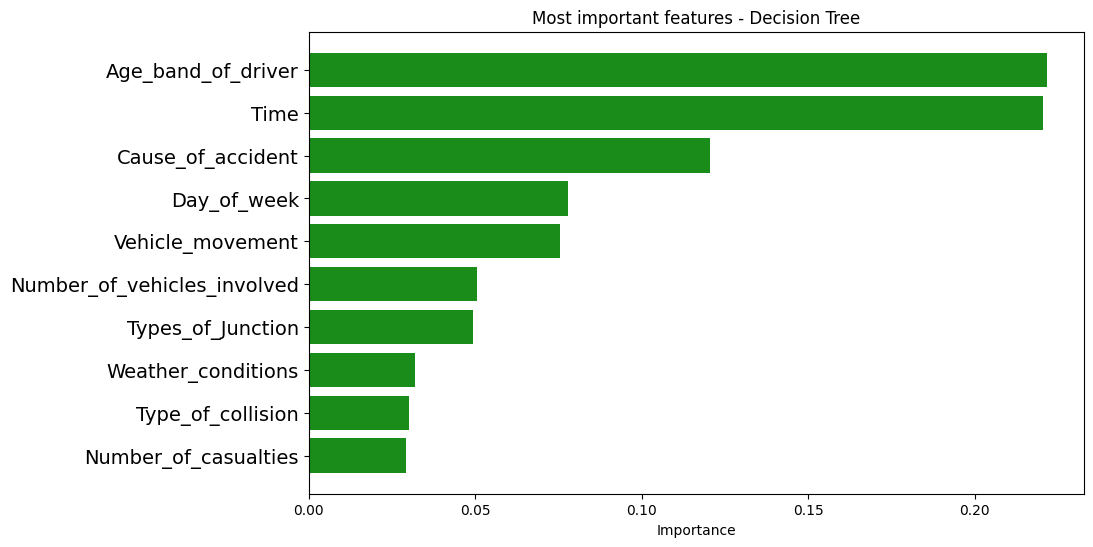

In [44]:
# Create list of top most features based on importance using information gain from Decision tree
feature_names = X_train.columns
feature_imports = dt.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.9,color="green")
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()